The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

    id : station identification code
    date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
    element : indicator of element type
        TMAX : Maximum temperature (tenths of degrees C)
        TMIN : Minimum temperature (tenths of degrees C)
    value : data value for element (tenths of degrees C)
    
The data is near Ann Arbor, Michigan, United States, and the stations the data comes from are shown on the map below.


The output is a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day is shaded.

A scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015 is plotted

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime as dt

In [15]:
df = pd.read_csv('/home/shubham/notebooks/coursera A2/weather data.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [16]:
df.drop(['ID'],axis = 1,inplace = True)
df['Year'] = df['Date'].str.slice(start=0, stop=4, step = 1)  
df['Date'] = [e[5:]for e in df['Date'].values]
df.head()

,Date,Element,Data_Value,Year
0,11-12,TMAX,22,2014
1,04-29,TMIN,56,2009
2,05-26,TMAX,278,2008
3,11-11,TMAX,139,2005
4,02-27,TMAX,-106,2014


In [17]:
pd.options.mode.chained_assignment = None
def df2005_2014():    
    df2005_2014 = df[df.Year != '2015']
    df2005_2014.drop(['Element'],axis = 1,inplace = True)
    df2005_2014min = df2005_2014.groupby(['Date']).min()
    df2005_2014max = df2005_2014.groupby(['Date']).max()
    df2005_2014min = df2005_2014min.rename(columns={"Data_Value": "Min_T"})
    df2005_2014max = df2005_2014max.rename(columns={"Data_Value": "Max_T"})
    df2005_2014 = pd.concat([df2005_2014max,df2005_2014min],axis = 1)
    df2005_2014.drop(['Year'],axis = 1,inplace = True)
    df2005_2014 = df2005_2014[df2005_2014.index != '02-29']
    df2005_2014.rename(columns={'Min_T': 'Min_T_during_2005-2014', 'Max_T': 'Max_T_during_2005-2014'}, inplace = True)
    df2005_2014.reset_index(inplace = True)
    return df2005_2014

df2005_2014()


,Date,Max_T_during_2005-2014,Min_T_during_2005-2014
0,01-01,156,-160
1,01-02,139,-267
2,01-03,133,-267
3,01-04,106,-261
4,01-05,128,-150
...,...,...,...
360,12-27,189,-138
361,12-28,194,-166
362,12-29,128,-150
363,12-30,117,-144


In [18]:
def df2015():
    df2015 = df[df.Year == '2015']
    df2015min = df2015.groupby(['Date']).min()
    df2015max = df2015.groupby(['Date']).max()
    df2015min = df2015min.rename(columns={"Data_Value": "Min_T"})
    df2015max = df2015max.rename(columns={"Data_Value": "Max_T"})
    df2015 = pd.concat([df2015max,df2015min],axis = 1)
    df2015.drop(['Element','Year'],axis = 1,inplace = True)
    df2015.rename(columns={'Min_T': 'Min_T_2015', 'Max_T': 'Max_T_2015'}, inplace = True)
    df2015.reset_index(inplace = True)
    return df2015

df2015()

,Date,Max_T_2015,Min_T_2015
0,01-01,11,-133
1,01-02,39,-122
2,01-03,39,-67
3,01-04,44,-88
4,01-05,28,-155
...,...,...,...
360,12-27,83,-6
361,12-28,61,-39
362,12-29,100,-39
363,12-30,67,-22


In [19]:
def dfdelta():
    dfdelta = df2015()
    dfdelta['Min_T_2015'] = np.where((df2005_2014()['Min_T_during_2005-2014'] > df2015()['Min_T_2015'])
                     , df2015()['Min_T_2015'], np.nan)
    dfdelta['Max_T_2015'] = np.where((df2005_2014()['Max_T_during_2005-2014'] < df2015()['Max_T_2015'])
                     , df2015()['Max_T_2015'], np.nan)
    dfdelta.dropna(axis=0, thresh=1, subset=None, inplace=True)
    dfdelta.rename(columns={'Min_T_2015': 'Min_T_2015_breaking_point', 'Max_T_2015': 'Max_T_2015_breaking_point'}, inplace = True)         
    return dfdelta

dfdelta()

,Date,Max_T_2015_breaking_point,Min_T_2015_breaking_point
0,01-01,NaN,NaN
1,01-02,NaN,NaN
2,01-03,NaN,NaN
3,01-04,NaN,NaN
4,01-05,NaN,-155.0
...,...,...,...
360,12-27,NaN,NaN
361,12-28,NaN,NaN
362,12-29,NaN,NaN
363,12-30,NaN,NaN


<strong><h2>Plotting</h2></strong>

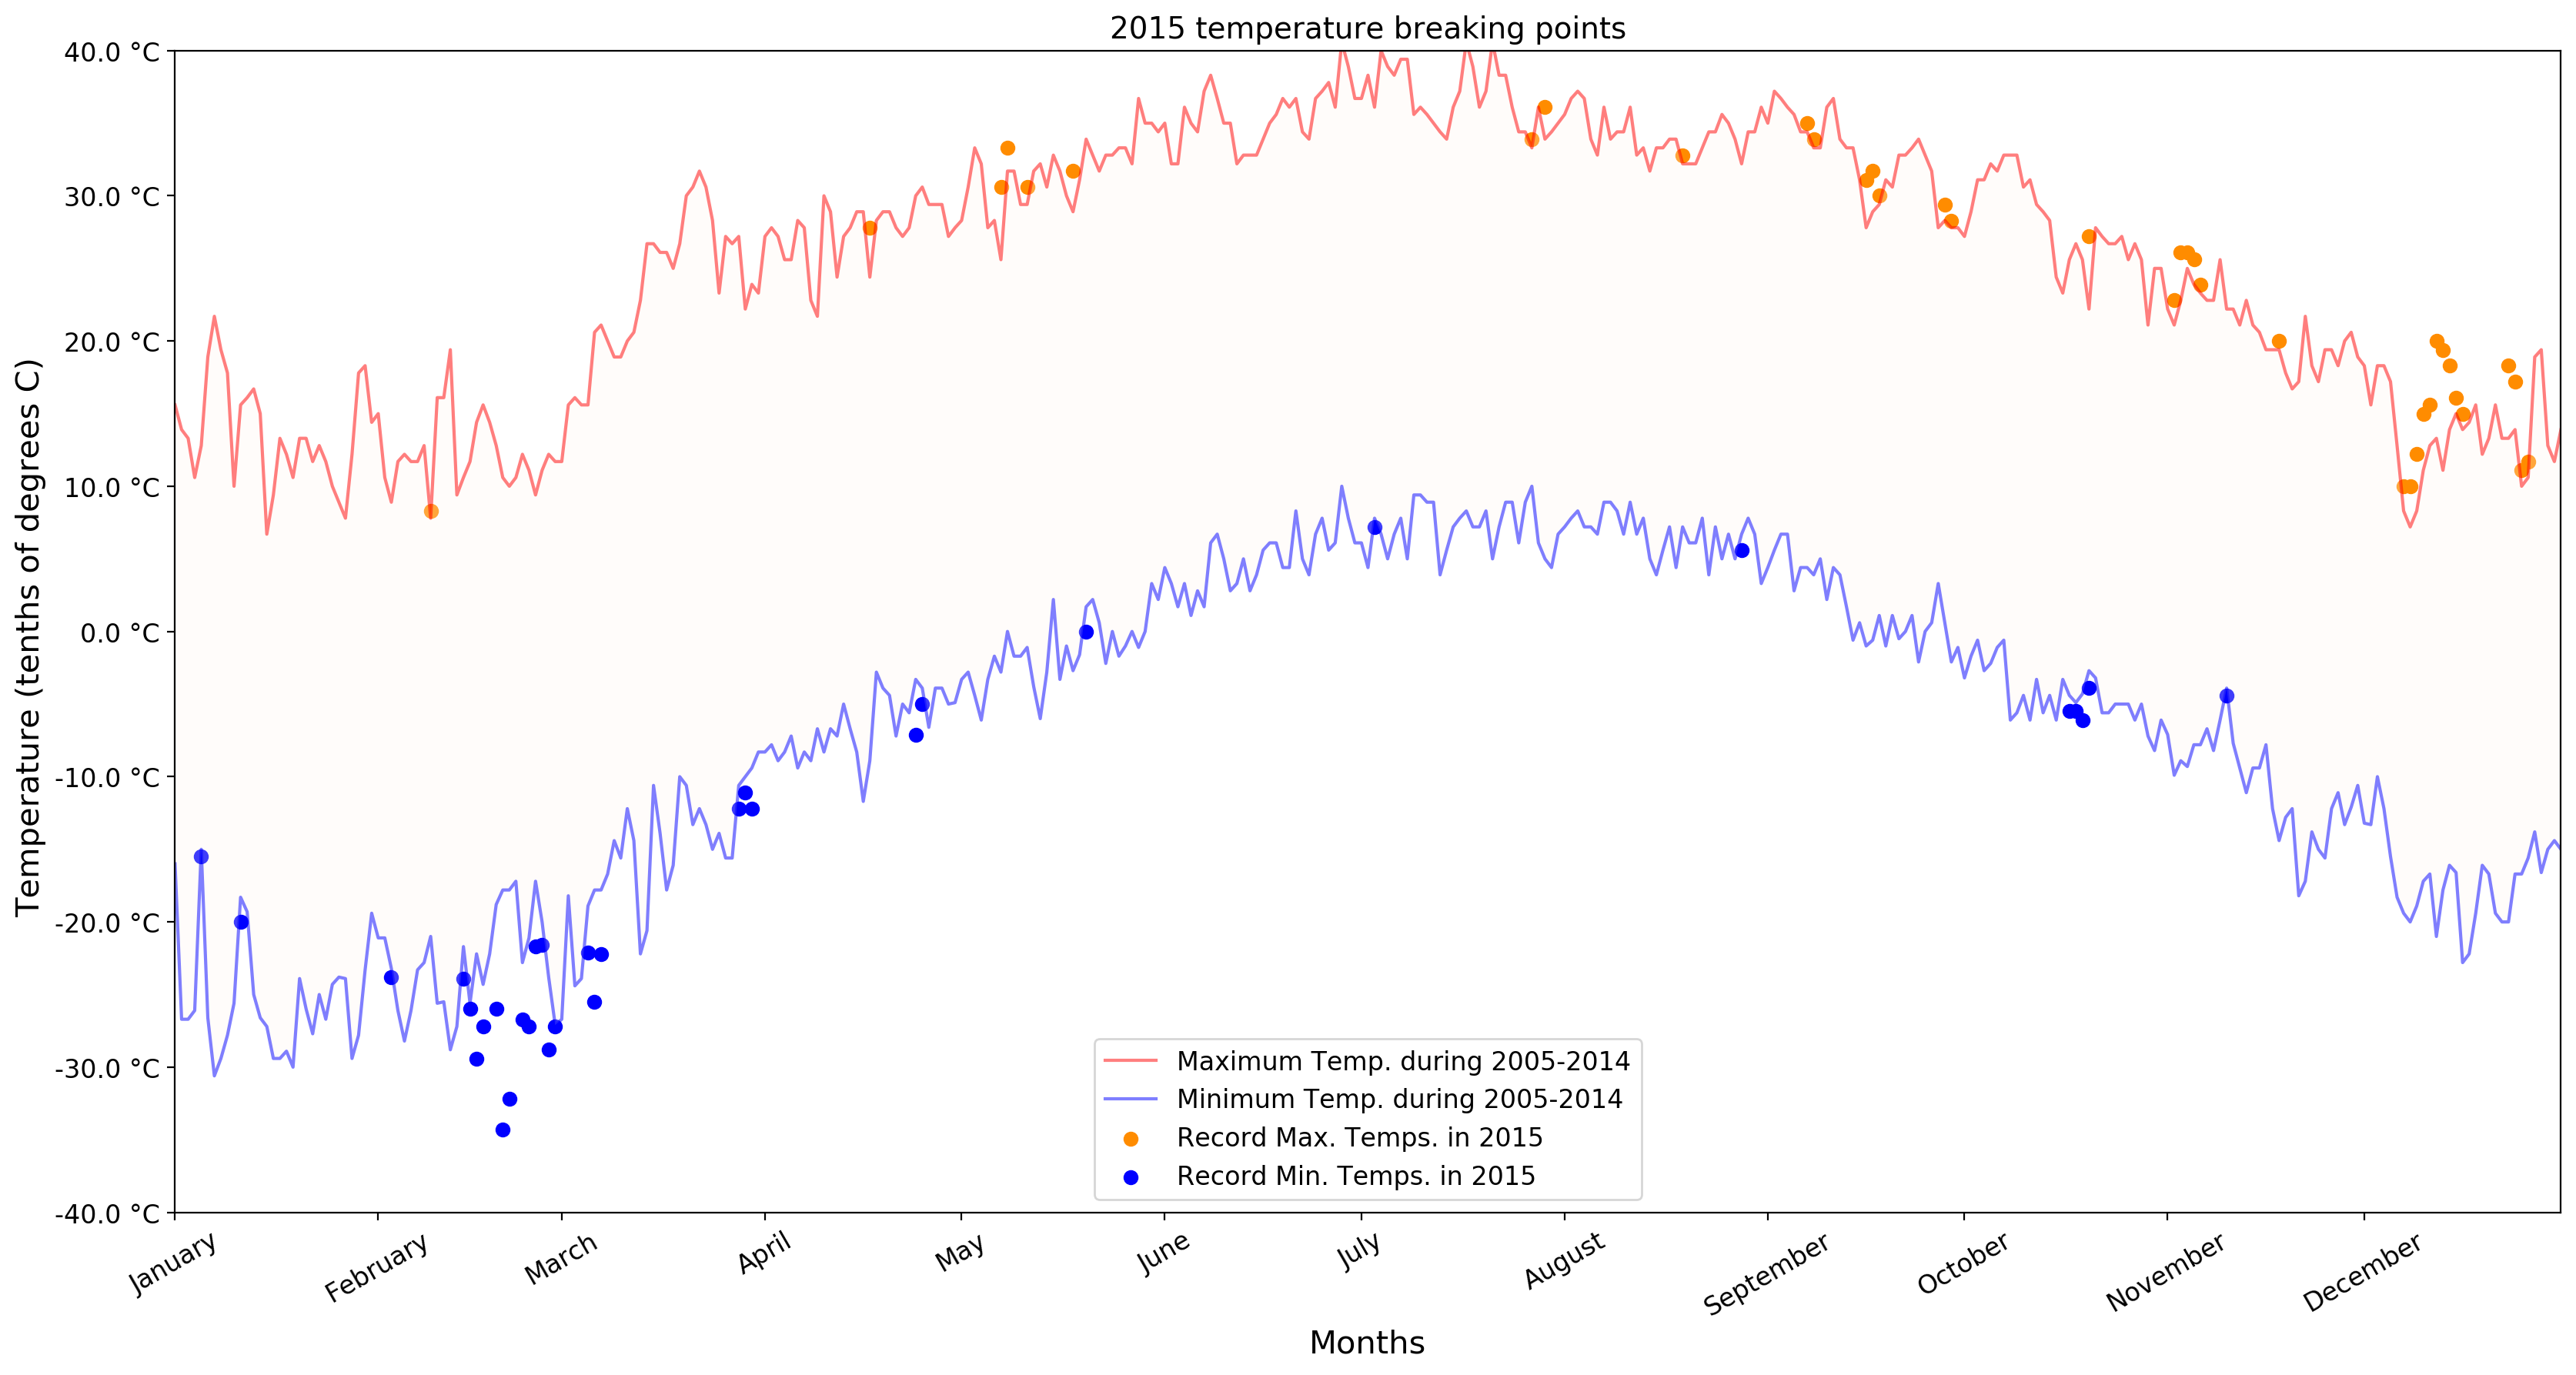

In [20]:
observation_dates = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_delta_dates = dfdelta().Date
observation_delta_dates = ['2015-'+ str(e) for e in observation_delta_dates]
observation_delta_dates = np.asarray(observation_delta_dates, dtype='datetime64[D]', order=None)

plt.figure(figsize=(20,10), dpi = 200)
plt.plot(observation_dates,df2005_2014()['Max_T_during_2005-2014'], color='red', alpha=0.5, label = 'Maximum Temp. during 2005-2014')
plt.plot(observation_dates,df2005_2014()['Min_T_during_2005-2014'], color='blue', alpha=0.5, label = 'Minimum Temp. during 2005-2014')
plt.scatter(observation_delta_dates, dfdelta()['Max_T_2015_breaking_point'], marker='o', color='darkorange', label = 'Record Max. Temps. in 2015')
plt.scatter(observation_delta_dates, dfdelta()['Min_T_2015_breaking_point'], marker='o', color ='blue',label = 'Record Min. Temps. in 2015')

ax = plt.gca()   
temp = [str(tick/10)+str(' °C') for tick in ax.get_yticks()]   
ax.set_yticklabels(temp)  
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)  
ax.axis([observation_dates[0],observation_dates[-1],-400,400])
    
myFmt = mdates.DateFormatter('%B')
plt.gca().xaxis.set_major_formatter(myFmt)  
plt.setp(ax.xaxis.get_majorticklabels(), ha="center", rotation = 30)
plt.gca().fill_between(observation_dates,df2005_2014()['Max_T_during_2005-2014'], df2005_2014()['Min_T_during_2005-2014'], facecolor='seashell', alpha=0.25)
    
plt.legend(loc=8, frameon=True, fontsize=12)
plt.xlabel('Months',fontsize = 15)
plt.ylabel('Temperature (tenths of degrees C) ', fontsize= 15)
plt.title('2015 temperature breaking points', fontsize=14)
    
plt.show()